In [48]:
!pip install mpl_toolkits.mplot3D 

ERROR: Could not find a version that satisfies the requirement mpl_toolkits.mplot3D (from versions: none)
ERROR: No matching distribution found for mpl_toolkits.mplot3D

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [7]:
imageraw=imread("LGMVIP-TASK3.webp")
imageraw

array([[[ 79,  30,  26],
        [ 79,  30,  26],
        [ 81,  31,  27],
        ...,
        [239, 250, 251],
        [239, 250, 251],
        [239, 250, 251]],

       [[ 81,  34,  30],
        [ 81,  34,  30],
        [ 81,  34,  30],
        ...,
        [239, 250, 251],
        [239, 250, 251],
        [239, 250, 251]],

       [[ 84,  40,  34],
        [ 84,  40,  34],
        [ 85,  41,  35],
        ...,
        [239, 250, 251],
        [239, 250, 251],
        [239, 250, 251]],

       ...,

       [[121, 133, 143],
        [121, 133, 143],
        [121, 133, 143],
        ...,
        [198, 202, 207],
        [198, 202, 207],
        [198, 202, 207]],

       [[122, 134, 144],
        [122, 134, 144],
        [122, 134, 144],
        ...,
        [198, 202, 207],
        [198, 202, 207],
        [198, 202, 207]],

       [[122, 134, 144],
        [122, 134, 144],
        [122, 134, 144],
        ...,
        [198, 202, 207],
        [198, 202, 207],
        [198, 202, 207]]

In [8]:
imageraw.shape

(480, 768, 3)

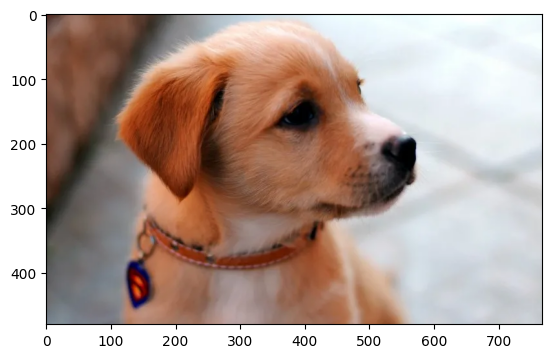

In [10]:
plt.imshow(imageraw) #knowing how the image looks like

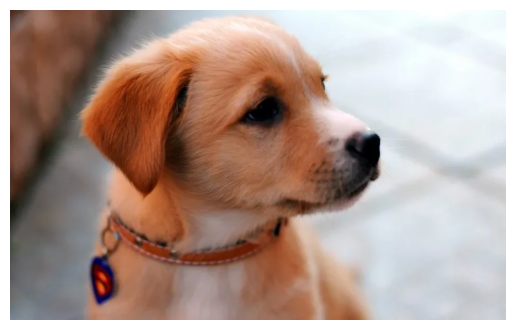

In [15]:
plt.imshow(imageraw)
plt.axis(False) #removing the axis
plt.show()

In [20]:
i=imageraw.sum(axis=2)
i

array([[135, 135, 139, ..., 740, 740, 740],
       [145, 145, 145, ..., 740, 740, 740],
       [158, 158, 161, ..., 740, 740, 740],
       ...,
       [397, 397, 397, ..., 607, 607, 607],
       [400, 400, 400, ..., 607, 607, 607],
       [400, 400, 400, ..., 607, 607, 607]], dtype=uint32)

In [21]:
i.shape

(480, 768)

In [23]:
ib=i/i.max()
ib


array([[0.17647059, 0.17647059, 0.18169935, ..., 0.96732026, 0.96732026,
        0.96732026],
       [0.18954248, 0.18954248, 0.18954248, ..., 0.96732026, 0.96732026,
        0.96732026],
       [0.20653595, 0.20653595, 0.21045752, ..., 0.96732026, 0.96732026,
        0.96732026],
       ...,
       [0.51895425, 0.51895425, 0.51895425, ..., 0.79346405, 0.79346405,
        0.79346405],
       [0.52287582, 0.52287582, 0.52287582, ..., 0.79346405, 0.79346405,
        0.79346405],
       [0.52287582, 0.52287582, 0.52287582, ..., 0.79346405, 0.79346405,
        0.79346405]])

In [24]:
ib.max()

1.0

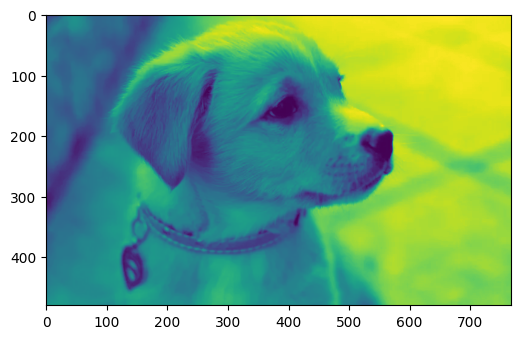

In [30]:
#plotting the figure size
plt.figure(figsize=(6,4))
plt.imshow(ib)

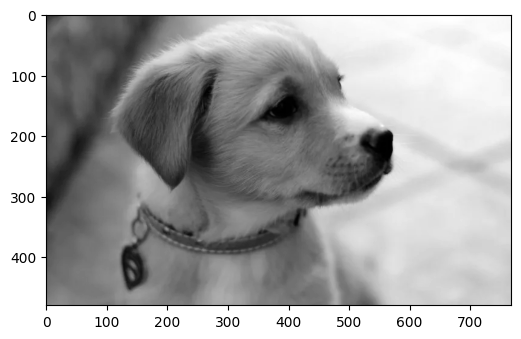

In [31]:
plt.figure(figsize=(6,4))
plt.imshow(ib,cmap=plt.cm.gray)

In [32]:
from sklearn.decomposition import PCA,IncrementalPCA

In [34]:
pca=PCA()
pca.fit(ib)
var=np.cumsum(pca.explained_variance_ratio_)*100
k=np.argmax(var>95)
print("The elements are"+str(k))

The elements are9


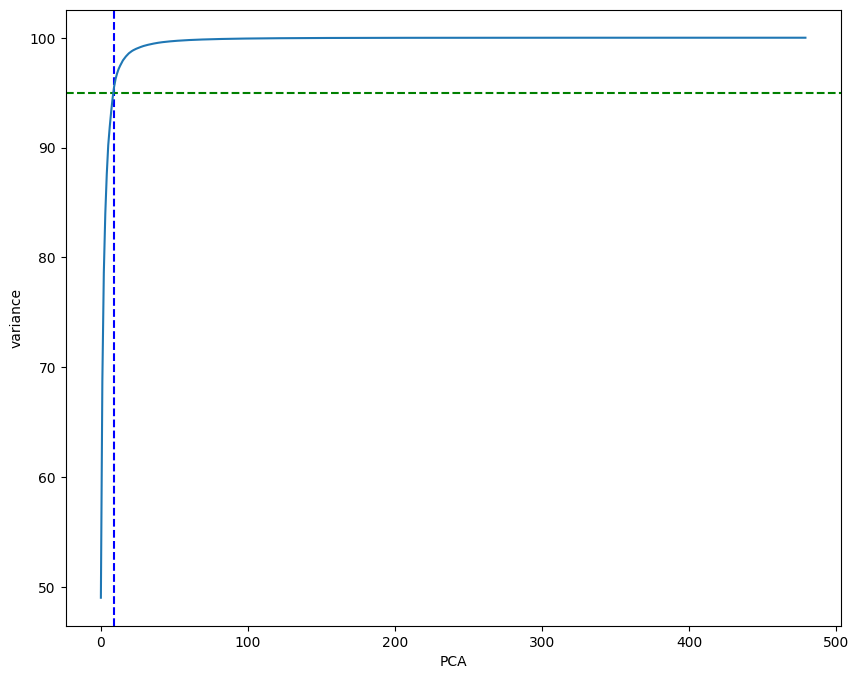

In [36]:
plt.figure(figsize=(10,8))
plt.ylabel('variance')
plt.xlabel('PCA')
plt.axvline(x=k,color='b',linestyle='--')
plt.axhline(y=95,color='g',linestyle='--')
ax=plt.plot(var)

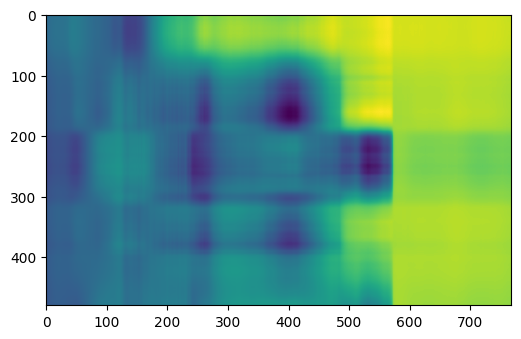

In [41]:
ipca=IncrementalPCA(n_components=2)
i=ipca.inverse_transform(ipca.fit_transform(ib))
plt.figure(figsize=(6,4))
plt.imshow(i)

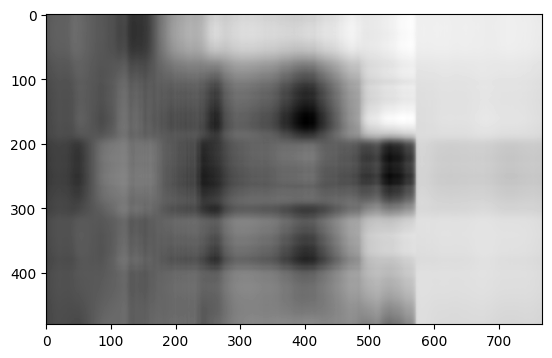

In [45]:
plt.imshow(i,cmap=plt.cm.gray)

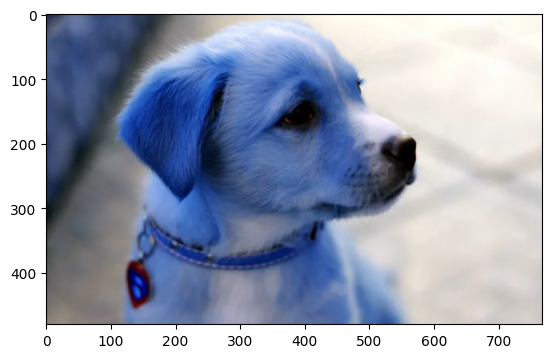

In [53]:
from mpl_toolkits.mplot3d import Axes3D
import cv2
o_img=cv2.imread("LGMVIP-TASK3.webp")
img=cv2.cvtColor(o_img,cv2.COLOR_BGR2RGB)
v=img.reshape(-1,3)
plt.imshow(o_img)


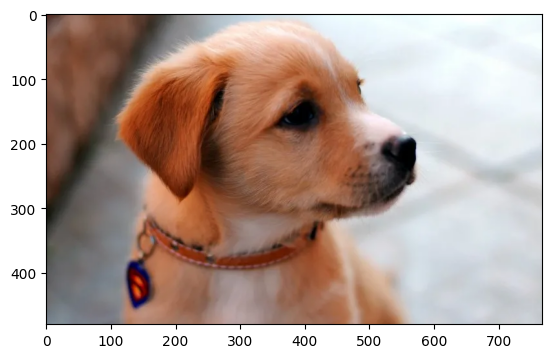

In [54]:
plt.imshow(img)

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x20e9834b640>)

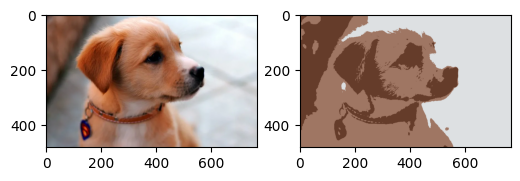

In [57]:
v=np.float32(v)
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
k=3
attempts=10
ret,label,center=cv2.kmeans(v,k,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center=np.uint8(center)
res=center[label.flatten()]
r=res.reshape(img.shape)
f1=6
f2=4
plt.figure(figsize=(f1,f2))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(r)

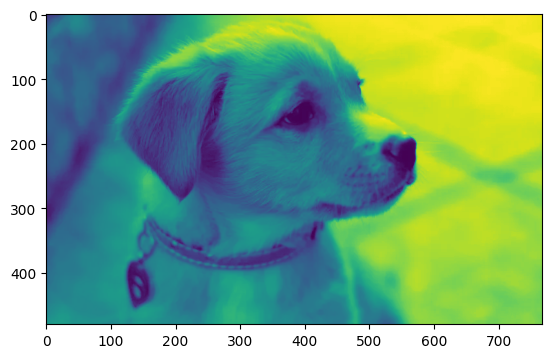

In [60]:
gray_image=cv2.cvtColor(imageraw,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

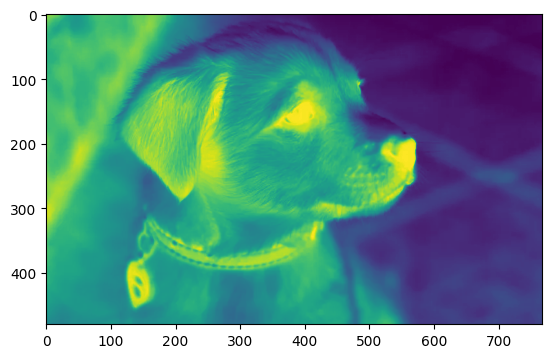

In [61]:
inverted_im=255-gray_image
plt.imshow(inverted_im)

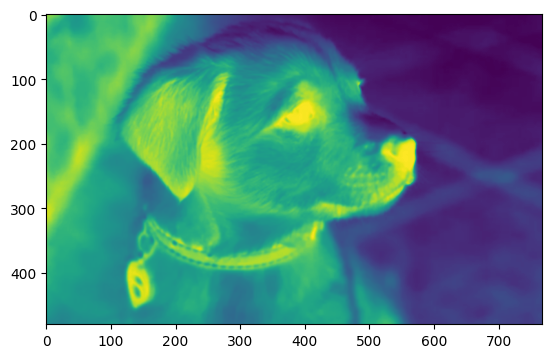

In [63]:
gblur_image1=cv2.GaussianBlur(inverted_im,(5,5),0)
plt.imshow(gblur_image1)

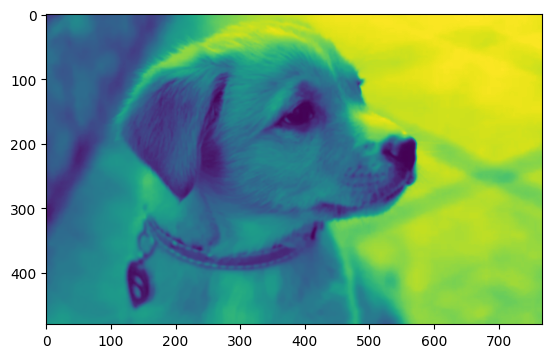

In [64]:
invgblur_im=255-gblur_image1
plt.imshow(invgblur_im)

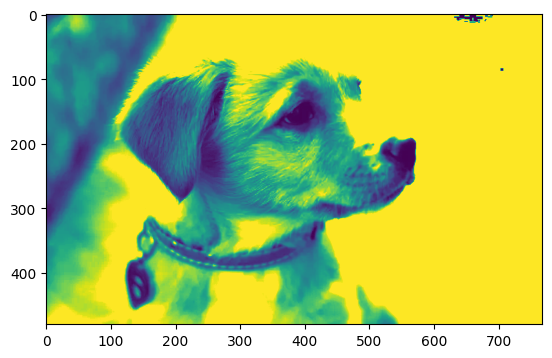

In [65]:
blur_image=255-inverted_im
p_image=255-blur_image
pencil_sketch1=cv2.divide(gray_image,p_image,scale=256.0)
plt.imshow(pencil_sketch1)

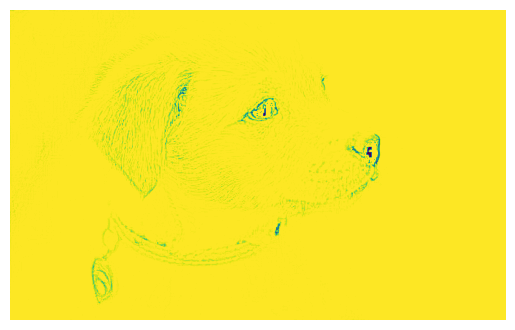

In [67]:
sketch_image=cv2.divide(gray_image,invgblur_im,scale=256.0)
plt.axis(False)
plt.imshow(sketch_image)

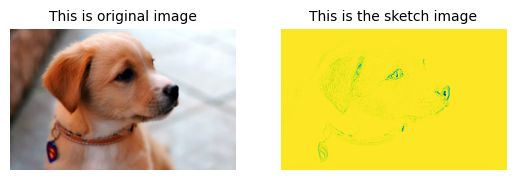

In [69]:
plt.subplot(1,2,1)
plt.title("This is original image",size=10)
plt.imshow(imageraw)
plt.axis('off')
plt.subplot(1,2,2)
plt.title("This is the sketch image",size=10)
plt.imshow(sketch_image)
plt.axis("off")
plt.show()

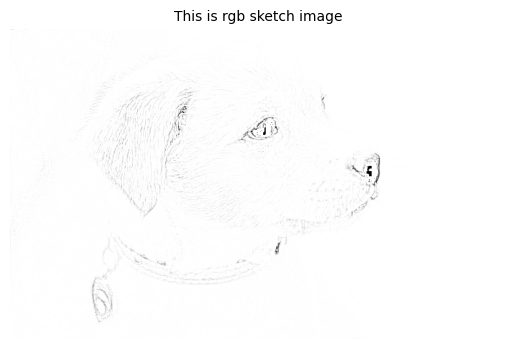

In [72]:
plt.title("This is rgb sketch image",size=10)
sketch=cv2.cvtColor(sketch_image,cv2.COLOR_BGR2RGB)
plt.imshow(sketch)
plt.axis("off")
plt.show()